https://replit.com/@VishnuTR/boilerplate-page-view-time-series-visualizer#time_series_visualizer.py

# Line chart, Grouped Bar chart, Box Plot

In [127]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import Data

In [19]:
df = pd.read_csv('C:/Users/91740/Downloads/fcc-forum-pageviews.csv',parse_dates = ["date"], index_col = "date")
#, index_col = "date" -- covert the date column into index
#parse_dates -- https://www.youtube.com/watch?v=wNcb5LOjMiM
#below example -- 'day','month' and 'year' are actual columns from the csv file
#if keep_date_col = True, then will keep the newly parsed 'Date' column as well as original 'day','month' and 'year' columns

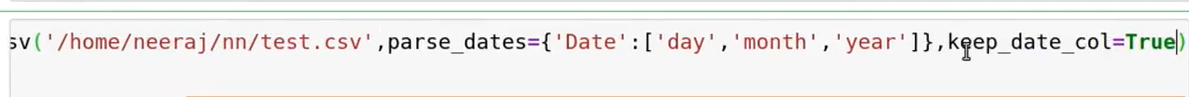

https://pandas.pydata.org/pandas-docs/version/0.20.1/generated/pandas.read_csv.html#:~:text=If%20True%20and%20parse_dates%20is,parsing%20speed%20by%205%2D10x.

refer for read_csv syntax and parse_dates

In [6]:
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


# Clean data
Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [8]:
#top 2.5% of the data
df["value"].quantile(0.025)

17876.4

In [9]:
#bottom 2.5% of the data
df["value"].quantile(0.975)

177613.075

In [10]:
# 2.5% lower quantile <= values <=  2.5% upper quantile
df = df[(df["value"] >= df["value"].quantile(0.025)) & (df["value"] <= df["value"].quantile(0.975))]

In [11]:
df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


# Draw line plot

Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.

plotted using ###Global API method/syntax ###OOP method/syntax not used

C:\Users\91740\anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


Text(0, 0.5, 'Page Views')

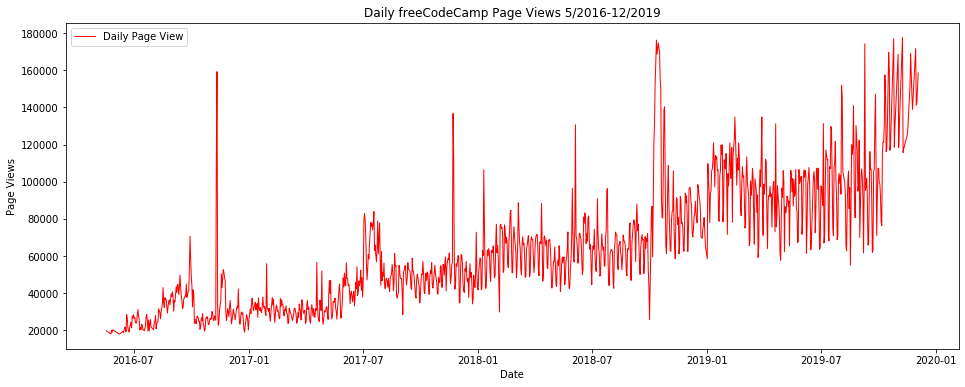

In [12]:
plt.figure(figsize=(16, 6))
plt.title('Daily freeCodeCamp Page Views 5/2016-12/2019')

plt.subplot(1, 1, 1)  # rows, columns, panel selected
plt.plot(df.index, df['value'],c='red',linewidth=1)
#plt.plot([0, 0, 0], [-10, 0, 100])
plt.legend(['Daily Page View'])
#ax.set_xlabel("") -- used in oop interface
#ax.set_ylabel("") -- used in oop interface
plt.xlabel('Date')
plt.ylabel('Page Views')

###using OOP method/syntax

<function matplotlib.pyplot.show(*args, **kw)>

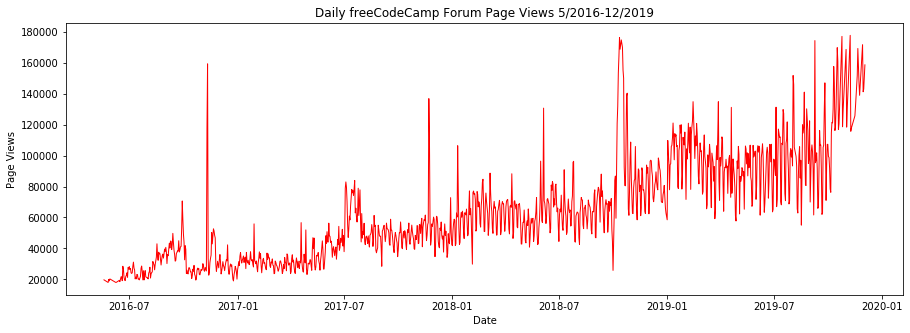

In [13]:
fig, ax = plt.subplots(figsize = (15,5))
ax.plot(df.index, df['value'], color='red', linewidth=1)
ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
ax.set_xlabel("Date")
ax.set_ylabel("Page Views")

#plt.show()
#''fig'' -- also gives the same result as 'plt.show()'
plt.show

# bar chart

It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

In [20]:
df_bar = df.copy()
df_bar.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [47]:
#df.index

In [48]:
#created a new column called month
df["month"] = df.index.month
df["month"]

date
2016-05-09     5
2016-05-10     5
2016-05-11     5
2016-05-12     5
2016-05-13     5
              ..
2019-11-29    11
2019-11-30    11
2019-12-01    12
2019-12-02    12
2019-12-03    12
Name: month, Length: 1304, dtype: int64

In [49]:
#created a new column called year
df["year"] = df.index.year
df["year"]

date
2016-05-09    2016
2016-05-10    2016
2016-05-11    2016
2016-05-12    2016
2016-05-13    2016
              ... 
2019-11-29    2019
2019-11-30    2019
2019-12-01    2019
2019-12-02    2019
2019-12-03    2019
Name: year, Length: 1304, dtype: int64

In [54]:
#resultant df after new column addition
df.head(4)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
 1   month   1304 non-null   int64
 2   year    1304 non-null   int64
dtypes: int64(3)
memory usage: 40.8 KB


In [55]:
#transform modify the actual data set with calculated values

In [62]:
#testing only
df_bar = df.groupby(["year", "month"])["value"].transform('mean')
df_bar.head()

date
2016-05-19    19432.4
2016-05-26    19432.4
2016-05-27    19432.4
2016-05-28    19432.4
2016-05-29    19432.4
Name: value, dtype: float64

In [51]:
#created for box plot
#calculatd mean, group by year and month
df_bar = df.groupby(["year", "month"])["value"].mean()
df_bar.head()

year  month
2016  5        11242.695652
      6        19124.366667
      7        23314.225806
      8        31049.193548
      9        41476.866667
Name: value, dtype: float64

In [65]:
# Copy and modify data for monthly bar plot
df_bar = df.copy()
df["month"] = df.index.month
df["year"] = df.index.year
df_bar = df.groupby(["year", "month"])["value"].mean()
df_bar = df_bar.unstack()

In [66]:
df_bar

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,11242.695652,19124.366667,23314.225806,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,112592.000000,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,162402.600000,100804.451613,117991.032258,97268.833333,150862.709677,181026.700000,173870.333333


In [41]:
#df_bar.reset_index()

In [42]:
#df_bar = df_bar.reset_index(drop=True)

In [43]:
#df_bar.head(20)

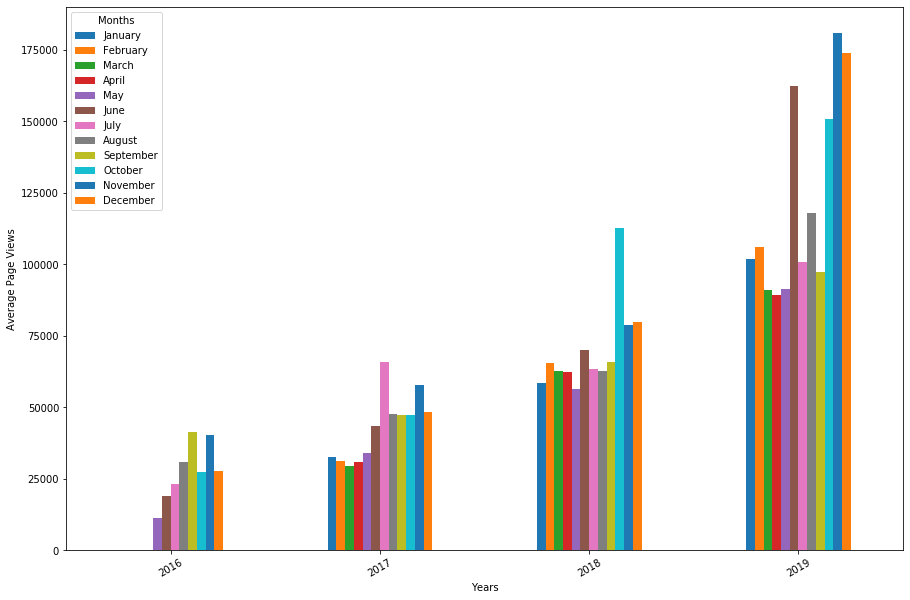

In [72]:
# Draw bar plot
fig = df_bar.plot(kind ="bar", legend = True, figsize = (15,10)).figure
plt.xlabel("Years", fontsize= 10)
plt.ylabel("Average Page Views", fontsize= 10)
plt.xticks(rotation=30)
#xtick and ytick are small lines that we see on the axis
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.legend(fontsize = 10, title="Months", labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

plt.show()

# Box plot

Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.

In [85]:
import seaborn as sns

In [108]:
df_box = df.copy()
df_box

,value,month,year
date,,,
2016-05-09,1201,5,2016
2016-05-10,2329,5,2016
2016-05-11,1716,5,2016
2016-05-12,10539,5,2016
2016-05-13,6933,5,2016
...,...,...,...
2019-11-29,171584,11,2019
2019-11-30,141161,11,2019
2019-12-01,142918,12,2019


In [109]:
df_box.reset_index(inplace=True)


In [110]:
df_box.head()

,date,value,month,year
0,2016-05-09,1201,5,2016
1,2016-05-10,2329,5,2016
2,2016-05-11,1716,5,2016
3,2016-05-12,10539,5,2016
4,2016-05-13,6933,5,2016


In [111]:
df_box['year'] = [d.year for d in df_box.date]


In [112]:
df_box['year']

0       2016
1       2016
2       2016
3       2016
4       2016
        ... 
1299    2019
1300    2019
1301    2019
1302    2019
1303    2019
Name: year, Length: 1304, dtype: int64

In [113]:
df_box['month'] = [d.strftime('%b') for d in df_box.date]

In [114]:
df_box['month']

0       May
1       May
2       May
3       May
4       May
       ... 
1299    Nov
1300    Nov
1301    Dec
1302    Dec
1303    Dec
Name: month, Length: 1304, dtype: object

In [115]:
#df_box["month_num"] = df_box["date"].dt.month

In [123]:
#df_box["month_num"]

In [117]:
#sort df_box dataframe based on 'month_num'
df_box = df_box.sort_values("month_num")

In [118]:
df_box

,date,value,month,year,month_num
602,2018-01-01,41810,Jan,2018,1
239,2017-01-03,31525,Jan,2017,1
240,2017-01-04,28955,Jan,2017,1
241,2017-01-05,35024,Jan,2017,1
242,2017-01-06,37353,Jan,2017,1
...,...,...,...,...,...
599,2017-12-29,72819,Dec,2017,12
598,2017-12-28,51018,Dec,2017,12
597,2017-12-27,43075,Dec,2017,12
233,2016-12-28,28424,Dec,2016,12


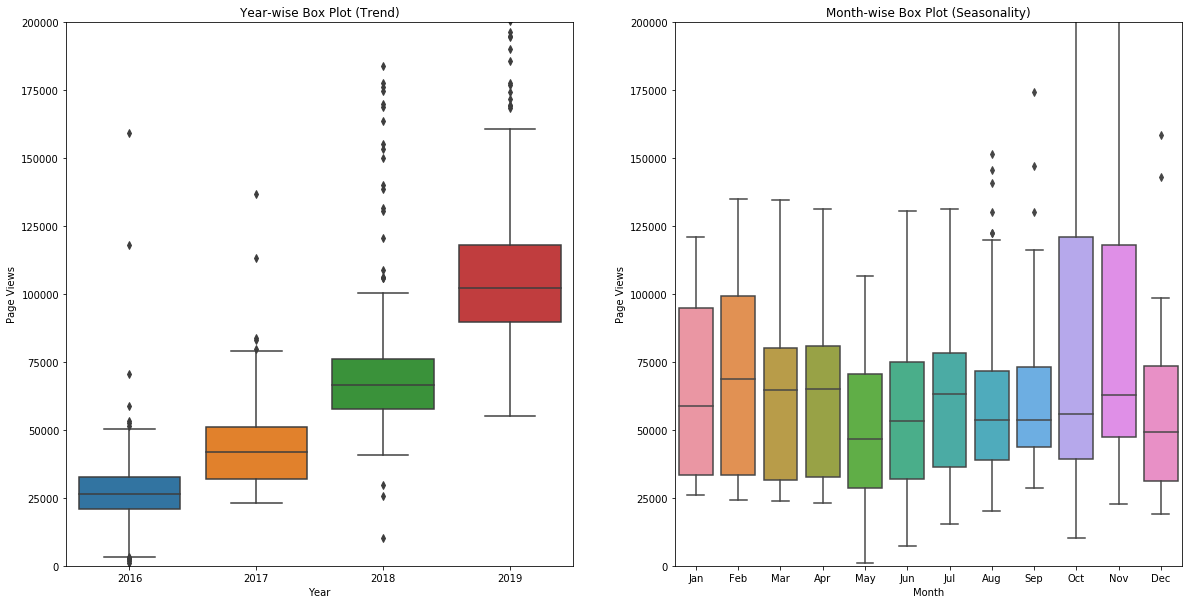

In [126]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(20)
fig.set_figheight(10)

ax1 = sns.boxplot(x=df_box["year"], y=df_box["value"], ax=ax1)
ax1.set_title("Year-wise Box Plot (Trend)") 
ax1.set_xlabel('Year')
ax1.set_ylabel('Page Views')
ax1.set(ylim=(0, 200000))

ax2 = sns.boxplot(x=df_box["month"], y=df_box["value"], ax=ax2)
ax2.set_title("Month-wise Box Plot (Seasonality)")
ax2.set_xlabel('Month')
ax2.set_ylabel('Page Views')
ax2.set(ylim=(0, 200000))

plt.show()